In [2]:
sigma = 10
rho = 28
beta = 8/3
h = 0.01

def fx(x, y):
    return sigma * (y - x)

def fy(x, y, z):
    return x * (rho - z) - y

def fz(x, y, z):
    return x * y - beta * z

def k1(x, y):
    return fx(x, y)

def l1(x, y, z):
    return fy(x, y, z)

def m1(x, y, z):
    return fz(x, y, z)

def k2(x, y, z):
    return fx(x + h * k1(x, y) / 2, y + h * l1(x, y, z) / 2)

def l2(x, y, z):
    return fy(x + h * k1(x, y) / 2, y + h * l1(x, y, z) / 2, z + h * m1(x, y, z) / 2)

def m2(x, y, z):
    return fz(x + h * k1(x, y) / 2, y + h * l1(x, y, z) / 2, z + h * m1(x, y, z) / 2)

def k3(x, y, z):
    return fx(x + h * k2(x, y, z) / 2, y + h * l2(x, y, z) / 2)

def l3(x, y, z):
    return fy(x + h * k2(x, y, z) / 2, y + h * l2(x, y, z) / 2, z + h * m2(x, y, z) / 2)

def m3(x, y, z):
    return fz(x + h * k2(x, y, z) / 2, y + h * l2(x, y, z) / 2, z + h * m2(x, y, z) / 2)

def k4(x, y, z):
    return fx(x + h * k3(x, y, z), y + h * l3(x, y, z))

def l4(x, y, z):
    return fy(x + h * k3(x, y, z), y + h * l3(x, y, z), z + h * m3(x, y, z))

def m4(x, y, z):
    return fz(x + h * k3(x, y, z), y + h * l3(x, y, z), z + h * m3(x, y, z))

def rk4(x, y, z):
    return x + h * (k1(x, y) + 2 * k2(x, y, z) + 2 * k3(x, y, z) + k4(x, y, z)) / 6, y + h * (l1(x, y, z) + 2 * l2(x, y, z) + 2 * l3(x, y, z) + l4(x, y, z)) / 6, z + h * (m1(x, y, z) + 2 * m2(x, y, z) + 2 * m3(x, y, z) + m4(x, y, z)) / 6

In [3]:
xn = 1
yn = 1
zn = 1
vals = []

for i in range(50000):
        vals.append([xn, yn, zn])
        x, y, z = rk4(xn, yn, zn)
        print(xn, yn, zn)
        xn, yn, zn = x, y, z


1 1 1
1.0125671910736112 1.2599177989452743 0.9848909717916053
1.0488237097089568 1.5239971313226008 0.973114219876485
1.1072088542956613 1.7983098897421352 0.9651589513000616
1.1868680166603462 2.0885401422061625 0.9617372249104278
1.287557057257908 2.4001544636681382 0.9638060638197575
1.4095706581041882 2.738545613747143 0.9726081698899176
1.5536900616953837 3.109153968487564 0.9897311222754546
1.7211463804529996 3.517569455166498 1.0171865238383704
1.9135962032916782 3.969615009809224 1.0575118553930003
2.133106543293639 4.471410647871953 1.1138989184687214
2.3821462580297044 5.029414948512368 1.190353726717964
2.663580910085269 5.650437904613584 1.291893499664662
2.9806675794712945 6.341615446625255 1.424786877461354
3.3370453308022423 7.110331233006836 1.5968433322113875
3.736715793797584 7.964065218724182 1.8177565221880947
4.184006533877147 8.910140801134848 2.0995032544473453
4.6835074584379015 9.955332873168457 2.4567936192098947
5.23996732507253 11.105288107586523 2.90755702

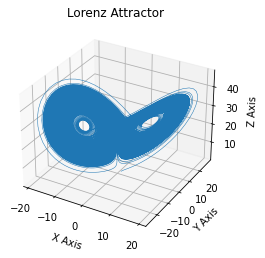

In [6]:
import matplotlib.pyplot as plt

ax = plt.figure().add_subplot(projection='3d')
ax.plot([i[0] for i in vals], [i[1] for i in vals], [i[2] for i in vals], lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")
plt.show()